In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
house = pd.read_csv('./train.csv', delimiter = ',')
test_data = pd.read_csv('./test.csv', delimiter = ',')

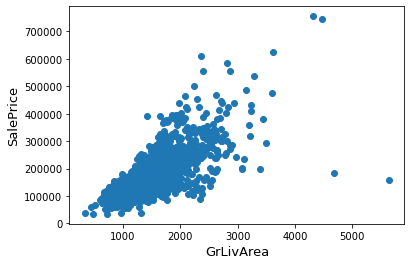

In [3]:
fig, ax = plt.subplots()
ax.scatter(x = house['GrLivArea'], y = house['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

We are able to see that there are two outliers may affect our data when GrLivArea > 4000 and SalePrice < 300,000, therefore we will remove them.

In [4]:
house = house.drop(columns = ['Id'])
house = house.drop(house[(house['GrLivArea'] > 4000) & (house['SalePrice'] < 300000)].index)
house = house.fillna(0)
test_Id = test_data['Id']
test_data = test_data.drop(columns = ['Id'])
test_data = test_data.fillna(0)

y_train = house['SalePrice'].values
final_df = pd.concat((house, test_data)).reset_index(drop = True)
final_df = final_df.drop(columns = 'SalePrice')

In [5]:
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [6]:
final_test = []
for category in final_df:
    if pd.to_numeric(final_df[str(category)], errors='coerce').notnull().all() == False:
        final_test.append(str(category))

In [7]:
final_dummies = pd.get_dummies(final_df, columns = final_test)

In [8]:
final_dummies

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2913,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,0,1,1,0,0,0,0,0
2914,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,0,1,1,0,0,0,0,0
2915,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [9]:
labels = house[['SalePrice']]
print("check labels: ", labels.head(3))
labels.shape[0]

check labels:     SalePrice
0     208500
1     181500
2     223500


1458

In [10]:
features = final_dummies.reset_index(drop = True)

In [11]:
features

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2913,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,0,1,1,0,0,0,0,0
2914,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,0,1,1,0,0,0,0,0
2915,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [22]:
X = features[:labels.shape[0]]
y = labels

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.05,random_state=0)

print("number of training samples: ", len(X_train))
print("number of test samples:", len(y_test))

number of training samples:  1385
number of test samples: 73


In [23]:
mlr = LinearRegression()
mlr.fit(X_train,y_train)
mlr_score = mlr.score(X_test,y_test)
pred_mlr = mlr.predict(X_test)
expl_mlr = explained_variance_score(pred_mlr,y_test)

In [24]:
pred_mlr

array([[ 151328.70849084],
       [ 158833.68276358],
       [  94033.36922645],
       [ 143230.88848916],
       [ 286376.11249524],
       [ 121311.37143254],
       [ 229014.68883533],
       [ 134521.28656732],
       [ 144698.17940081],
       [  98781.77722507],
       [ 238765.76923869],
       [ 103477.41913176],
       [ 130364.18387147],
       [ 145243.59013042],
       [ 115048.1988292 ],
       [ 235812.07429279],
       [ 199147.55440051],
       [  57323.83420562],
       [ 161531.28717216],
       [ 420866.92778979],
       [ 311302.7281607 ],
       [ 118235.74198674],
       [  92466.2632536 ],
       [ 101880.86314252],
       [ 108668.5207113 ],
       [ 287819.45554909],
       [ 225770.23673367],
       [ 108309.09653169],
       [ 131865.90259138],
       [ 408145.63997267],
       [ 156861.99513199],
       [ 237817.087452  ],
       [ 145997.71078433],
       [ 198265.62927366],
       [ 106303.19140657],
       [ 109643.66970755],
       [ 220914.6062707 ],
 

In [25]:
y_test

,SalePrice
411,145000
211,186000
342,87500
303,149900
159,320000
...,...
1170,171000
905,128000
969,140000
529,200624


In [26]:
from sklearn.tree import DecisionTreeRegressor
tr_regressor = DecisionTreeRegressor(random_state=0)
tr_regressor.fit(X_train,y_train)
tr_regressor.score(X_test,y_test)
pred_tr = tr_regressor.predict(X_test)
decision_score=tr_regressor.score(X_test,y_test)
expl_tr = explained_variance_score(pred_tr,y_test)

In [27]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=28,random_state=0)
rf_regressor.fit(X_train,y_train)
rf_regressor.score(X_test,y_test)
rf_pred =rf_regressor.predict(X_test)
rf_score=rf_regressor.score(X_test,y_test)
expl_rf = explained_variance_score(rf_pred,y_test)

In [28]:
print("Multiple Linear Regression Model Score is ",round(mlr.score(X_test,y_test)*100))
print("Decision tree  Regression Model Score is ",round(tr_regressor.score(X_test,y_test)*100))
print("Random Forest Regression Model Score is ",round(rf_regressor.score(X_test,y_test)*100))

#Let's have a tabular pandas data frame, for a clear comparison

models_score =pd.DataFrame({'Model':['Multiple Linear Regression','Decision Tree','Random forest Regression'],
                            'Score':[mlr_score,decision_score,rf_score],
                            'Explained Variance Score':[expl_mlr,expl_tr,expl_rf]
                           })
models_score.sort_values(by='Score',ascending=False)

Multiple Linear Regression Model Score is  -51
Decision tree  Regression Model Score is  84
Random Forest Regression Model Score is  89


,Model,Score,Explained Variance Score
2,Random forest Regression,0.887574,0.863405
1,Decision Tree,0.835508,0.828866
0,Multiple Linear Regression,-0.507094,0.357473


In [29]:
prediction_df = pd.DataFrame(rf_regressor.predict(features[labels.shape[0]:]), columns = ['SalePrice'])
prediction_df['Id'] = test_Id
prediction_df.head()

,SalePrice,Id
0,122789.285714,1461
1,156198.214286,1462
2,180361.321429,1463
3,186406.785714,1464
4,201454.500000,1465


In [1368]:
prediction_df.to_csv("my_predictions.csv", index = False)